In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
ds = ['emodb', 'emovo', 'ravdess']

In [3]:
mtd_ls = {}
for d in ds:
    mtd_ls[d] = pd.read_csv(f"D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data//{d}/metadata_final.csv")
    
    # pd.read_csv(f"/datasets/nicolas_facchinetti/img_data/{d}_df.csv")
    

In [4]:
mtd_ls[ds[0]]

,path,filename,chunk,label,actor,gender,mod
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,0
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,1
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,1
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,1
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,1
...,...,...,...,...,...,...,...
4151,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,0,angry,16,f,1
4152,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,0,angry,16,f,2
4153,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,0,angry,16,f,2
4154,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,0,angry,16,f,2


In [5]:
mtd_ls[ds[1]]

,path,filename,chunk,label,actor,gender,mod
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,0
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,1
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,1
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,1
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,1
...,...,...,...,...,...,...,...
4923,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n5.wav,1,sad,m3,m,2
4924,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n5.wav,0,sad,m3,m,2
4925,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n5.wav,1,sad,m3,m,2
4926,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n5.wav,0,sad,m3,m,2


In [6]:
mtd_ls[ds[2]]

,path,filename,chunk,label,actor,gender,mod
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-02-01-01-01-01.wav,0,calm,Actor_01,m,0
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-02-01-01-01-01.wav,0,calm,Actor_01,m,1
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-02-01-01-01-01.wav,0,calm,Actor_01,m,1
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-02-01-01-01-01.wav,0,calm,Actor_01,m,1
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-02-01-01-01-01.wav,0,calm,Actor_01,m,1
...,...,...,...,...,...,...,...
8965,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-02-24.wav,0,surprised,Actor_24,f,1
8966,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-02-24.wav,0,surprised,Actor_24,f,2
8967,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-02-24.wav,0,surprised,Actor_24,f,2
8968,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-02-24.wav,0,surprised,Actor_24,f,2


In [18]:
mtd_ls[ds[0]].label.unique()

array(['happy', 'neutral', 'sad', 'angry', 'fear'], dtype=object)

In [19]:
mtd_ls[ds[1]].label.unique()

array(['happy', 'fear', 'angry', 'surprised', 'sad'], dtype=object)

In [17]:
mtd_ls[ds[2]].label.unique()

array(['calm', 'sad', 'angry', 'disgust', 'surprised'], dtype=object)

In [7]:
random_state = 1997

In [20]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant', 'prior']

def dummy_scores(d):
    y = d['label']
    X = d.drop('label', axis = 1)
    X = X.drop('actor', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    

    test_scores = []
    for s in strategies:
        if s =='constant':
            dclf = DummyClassifier(strategy = s, random_state = random_state, constant ='angry')
        else:
            dclf = DummyClassifier(strategy = s, random_state = random_state)
        dclf.fit(X_train, y_train)
        score = dclf.score(X_test, y_test)
        test_scores.append(score)
    return test_scores

In [21]:
scores = {d: dummy_scores(mtd_ls[d]) for d in ds}

In [22]:
def plot_scores(scores):
    strategies = ['most_frequent', 'stratified', 'uniform', 'constant', 'prior']
    plt.plot(strategies, scores, 'ro')
    plt.show()

emodb


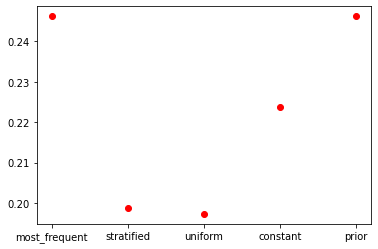

emovo


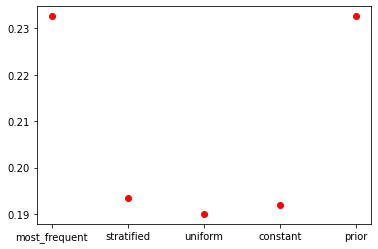

ravdess


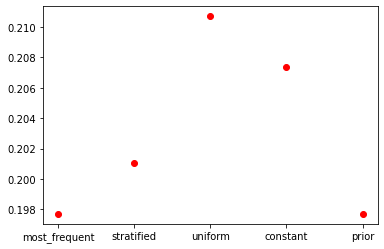

In [23]:
for d in ds:
    print(d)
    plot_scores(scores[d])

In [24]:
best_strategies = []
for d in ds:
    max_value = max(scores[d])
    max_index = scores[d].index(max_value)
    best_strategies.append(strategies[max_index])
    print(f'For {d} best strategy is {strategies[max_index]} with score {max_value}')

For emodb best strategy is most_frequent with score 0.24619085805934243
For emovo best strategy is most_frequent with score 0.2325895875591616
For ravdess best strategy is uniform with score 0.21070234113712374


In [25]:
best_strategies

['most_frequent', 'most_frequent', 'uniform']

emodb with most_frequent
emovo with most_frequent
ravdess with uniform


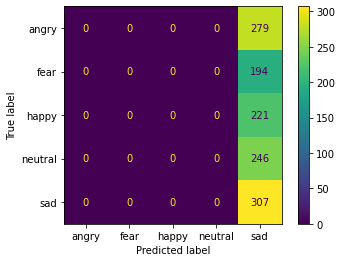

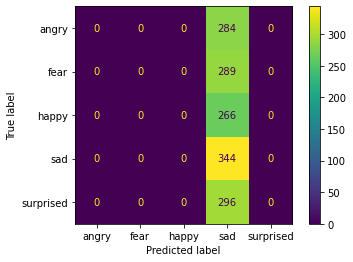

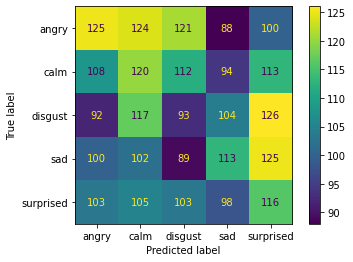

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for st, d in zip(best_strategies, mtd_ls):
    print(f'{d} with {st}')
    ds = mtd_ls[d]
    y = ds['label']
    X = ds.drop('label', axis = 1)
    X = X.drop('actor', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    
    if st =='constant':
        dclf = DummyClassifier(strategy = st, random_state = random_state, constant ='angry')
    else:
        dclf = DummyClassifier(strategy = st, random_state = random_state)
        
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=dclf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dclf.classes_)
    disp.plot()